In [4]:
import os
import cv2

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
DATA_PATH = ".../aiornot"

In [6]:
df_train = pd.read_csv(os.path.join(DATA_PATH, "train.csv"))
sub = pd.read_csv(os.path.join(DATA_PATH, "sample_submission.csv"))
df_test = sub.copy()

In [7]:
# Head of the dataframes
print("Train dataframe: ")
print(df_train.head(3))
print(" ")
print("Sample submission: ")
print(sub.head(3))

Train dataframe: 
      id  label
0  0.jpg      1
1  1.jpg      1
2  2.jpg      1
 
Sample submission: 
       id  label
0   0.jpg      0
1   1.jpg      0
2  10.jpg      0


In [8]:
# Shapes
print(f"Train dataframe shape: {df_train.shape}")
print(f"Sample submission shape: {sub.shape}")

Train dataframe shape: (18618, 2)
Sample submission shape: (43442, 2)


In [9]:
# Null values
print("Null values:")
print(df_train.isnull().sum())

Null values:
id       0
label    0
dtype: int64


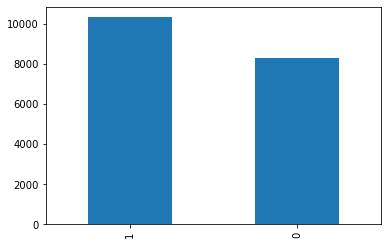

In [10]:
# Label distribution
df_train["label"].value_counts().plot.bar()
plt.show()

In [11]:
# Image size distribution
def print_image_sizes(img_paths):
    img_sizes = [cv2.imread(img).shape for img in img_paths]
    img_sizes = np.stack(img_sizes)
    print(f"Minimum size: {img_sizes.min(axis=0)}")
    print(f"Maximum size: {img_sizes.max(axis=0)}")
    
df_train["image_path"] = df_train["id"].apply(lambda x: os.path.join(DATA_PATH, "train", x))
df_test["image_path"] = df_test["id"].apply(lambda x: os.path.join(DATA_PATH, "test", x))

# print_image_sizes(df_train["image_path"].values)
# print_image_sizes(df_test["image_path"].values)

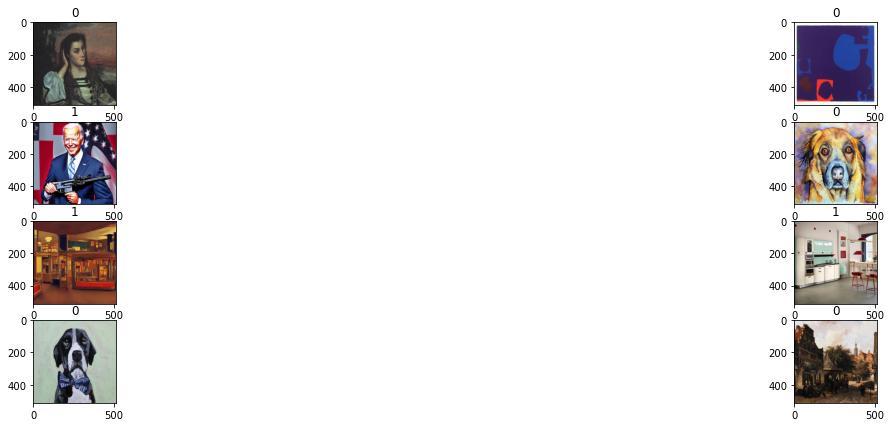

In [10]:
# Display some images
Nx_IMGS = 4
Ny_IMGS = 2

fig, ax = plt.subplots(Nx_IMGS,Ny_IMGS, figsize=(25,7))
ax = ax.reshape(-1)
for k,img in enumerate(range(Nx_IMGS*Ny_IMGS)):
    idx = np.random.randint(0, len(df_train))
    image = cv2.imread(df_train["image_path"][idx])
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    label = df_train["label"][idx]
    ax[k].imshow(image)
    ax[k].set_title(label)
plt.show()

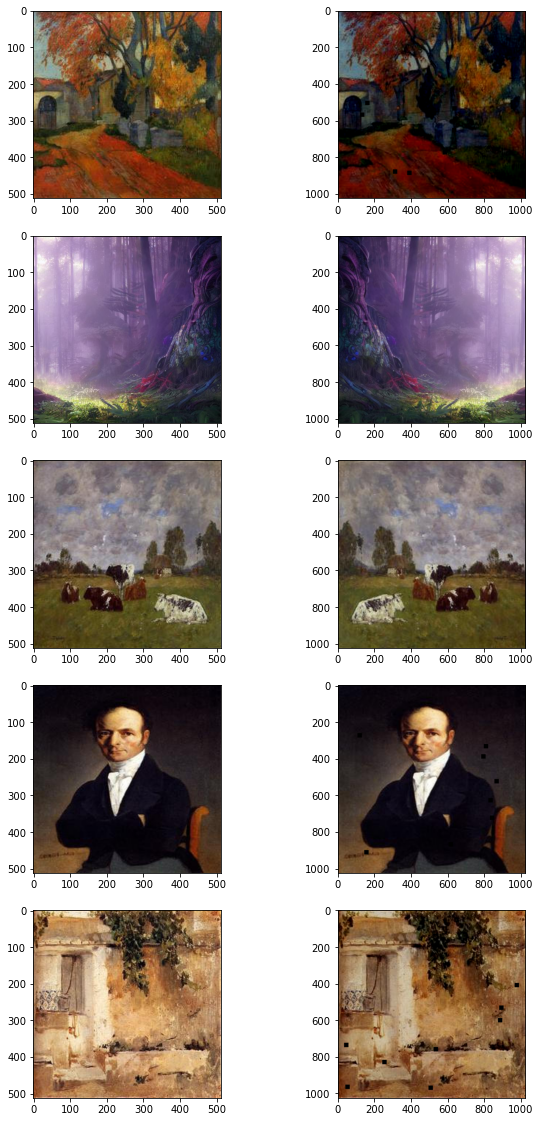

In [14]:
# Try some image augmentationsa
import cv2
import albumentations as A

n_figures = 5
idxs = np.random.randint(0, len(df_train), size=n_figures) + 25
fig, ax = plt.subplots(n_figures,2, figsize=(10,20))

for k,idx in enumerate(idxs):
    image = cv2.imread(df_train["image_path"][idxs[k]])
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    image_aug = A.Resize(1024, 1024, p=1.0)(image=image)["image"]
    image_aug = A.HorizontalFlip(p=0.5)(image=image_aug)["image"]
    # image_aug = A.CLAHE(clip_limit=3.0, p=0.5)(image=image_aug)["image"]
    # image_aug = A.CoarseDropout(max_holes=12, max_height=16, max_width=16, p=0.5)(image=image_aug)["image"]
    # image_aug = A.RandomBrightness(limit=0.2, p=0.5)(image=image_aug)["image"]
    # image_aug = A.RandomContrast(limit=0.2, p=0.5)(image=image_aug)["image"]
    image_aug = A.ShiftScaleRotate(rotate_limit=0, border_mode=0, p=0.5)(image=image_aug)["image"]
    image_aug = A.RGBShift(p=0.5)(image=image_aug)["image"]
    image_aug = A.RandomBrightnessContrast(p=0.5)(image=image_aug)["image"]
    # image_aug = A.CoarseDropout(max_holes=1, max_height=int(512*0.15), max_width=int(512*0.15), p=0.5)(image=image_aug)["image"]
    # image_aug = A.GridDistortion(p=0.5)(image=image_aug)["image"]
    # image_aug = A.RandomGridShuffle(p=1)(image=image_aug)["image"]
    # image_aug = A.RandomBrightnessContrast(p=1)(image=image_aug)["image"]
    # image_aug = A.RGBShift(p=1)(image=image_aug)["image"]
    image_aug = A.CoarseDropout(max_height=24, max_width=24, p=0.5)(image=image_aug)["image"]
    # image_aug = A.RandomBrightnessContrast(p=0.5)(image=image_aug)["image"]
    # image_aug = A.RandomResizedCrop(height=512, width=512, p=1)(image=image_aug)["image"]
    # image_aug = A.HueSaturationValue(hue_shift_limit=40, sat_shift_limit=40, val_shift_limit=0, p=0.5)(image=image_aug)["image"]
    ax[k,0].imshow(image)
    ax[k,1].imshow(image_aug)
plt.show()